In [19]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [21]:
df = pd.read_csv("pizza_sales.csv")
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [22]:
df.to_sql('sales', conn, if_exists='replace', index=False)

48620

In [23]:
cursor = conn.cursor()
cursor.execute("SELECT COUNT(*) FROM sales")
print("Total rows inserted:", cursor.fetchone()[0])


Total rows inserted: 48620


In [25]:
query1 = """
SELECT pizza_name, SUM(quantity) AS total_quantity, SUM(total_price) AS total_revenue
FROM sales
GROUP BY pizza_name
ORDER BY total_revenue DESC
"""
df1 = pd.read_sql_query(query1, conn)
print("Total Quantity and Revenue per Pizza:\n", df1)

Total Quantity and Revenue per Pizza:
                                     pizza_name  total_quantity  total_revenue
0                       The Thai Chicken Pizza          2371.0       43434.25
1                   The Barbecue Chicken Pizza          2432.0       42768.00
2                 The California Chicken Pizza          2370.0       41409.50
3                     The Classic Deluxe Pizza          2453.0       38180.50
4                      The Spicy Italian Pizza          1924.0       34831.25
5                  The Southwest Chicken Pizza          1917.0       34705.75
6                    The Italian Supreme Pizza          1884.0       33476.75
7                           The Hawaiian Pizza          2422.0       32273.25
8                        The Four Cheese Pizza          1902.0       32265.70
9                           The Sicilian Pizza          1938.0       30940.50
10                         The Pepperoni Pizza          2418.0       30161.75
11                       

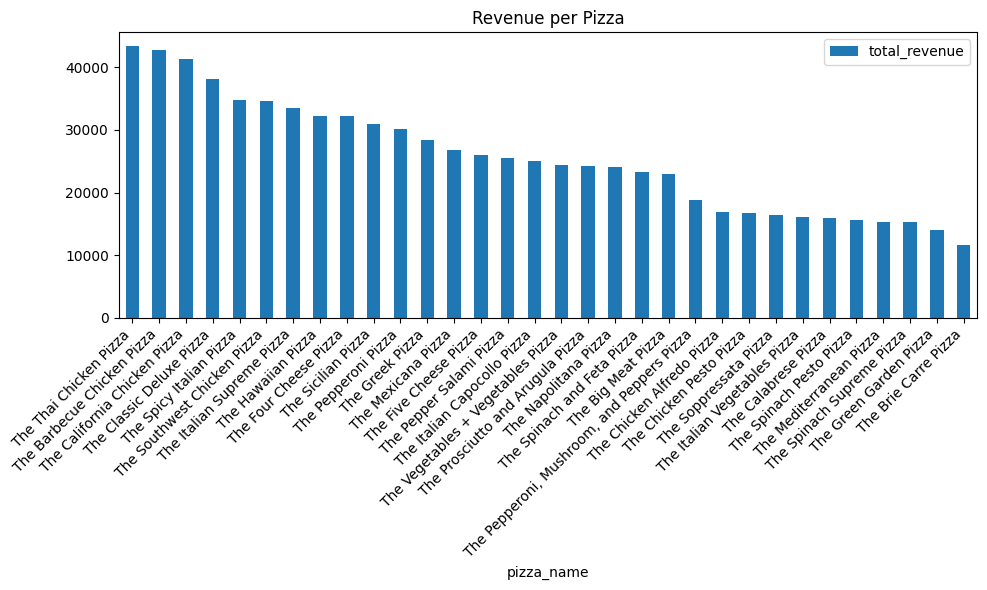

In [26]:
df1.plot(kind='bar', x='pizza_name', y='total_revenue', title='Revenue per Pizza', figsize=(10,6))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("pizza_revenue_chart.png")
plt.show()

In [28]:
query2 = """
SELECT pizza_category, SUM(total_price) AS total_revenue
FROM sales
GROUP BY pizza_category
"""
df2 = pd.read_sql_query(query2, conn)
print("\n Revenue by Pizza Category:\n", df2)


 Revenue by Pizza Category:
   pizza_category  total_revenue
0        Chicken      195919.50
1        Classic      220053.10
2        Supreme      208197.00
3         Veggie      193690.45


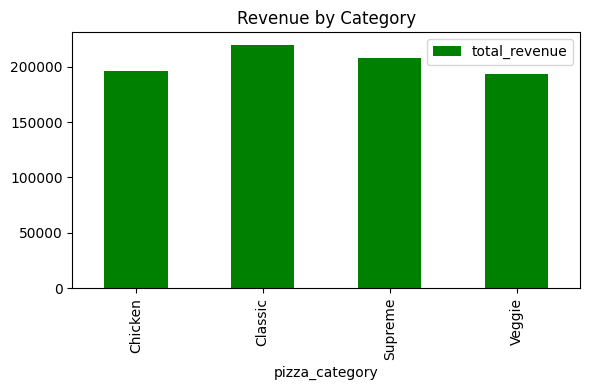

In [29]:
df2.plot(kind='bar', x='pizza_category', y='total_revenue', title='Revenue by Category', color='green', figsize=(6,4))
plt.tight_layout()
plt.savefig("category_revenue_chart.png")
plt.show()

In [30]:
conn.close()